In [ ]:
pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier




In [ ]:
# Load your dataset
df = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0   

<Axes: xlabel='Diabetes_binary', ylabel='count'>

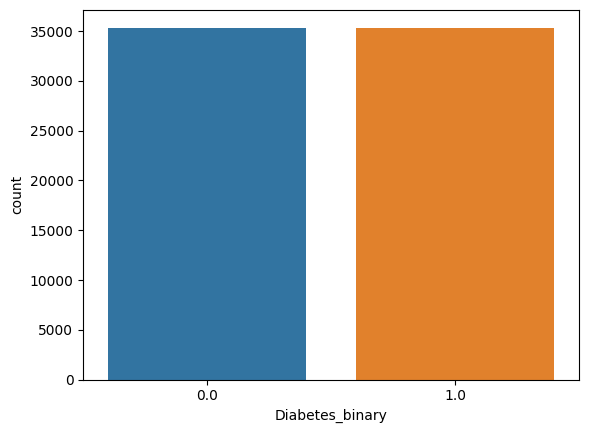

In [ ]:
sns.countplot(data=df,x='Diabetes_binary')

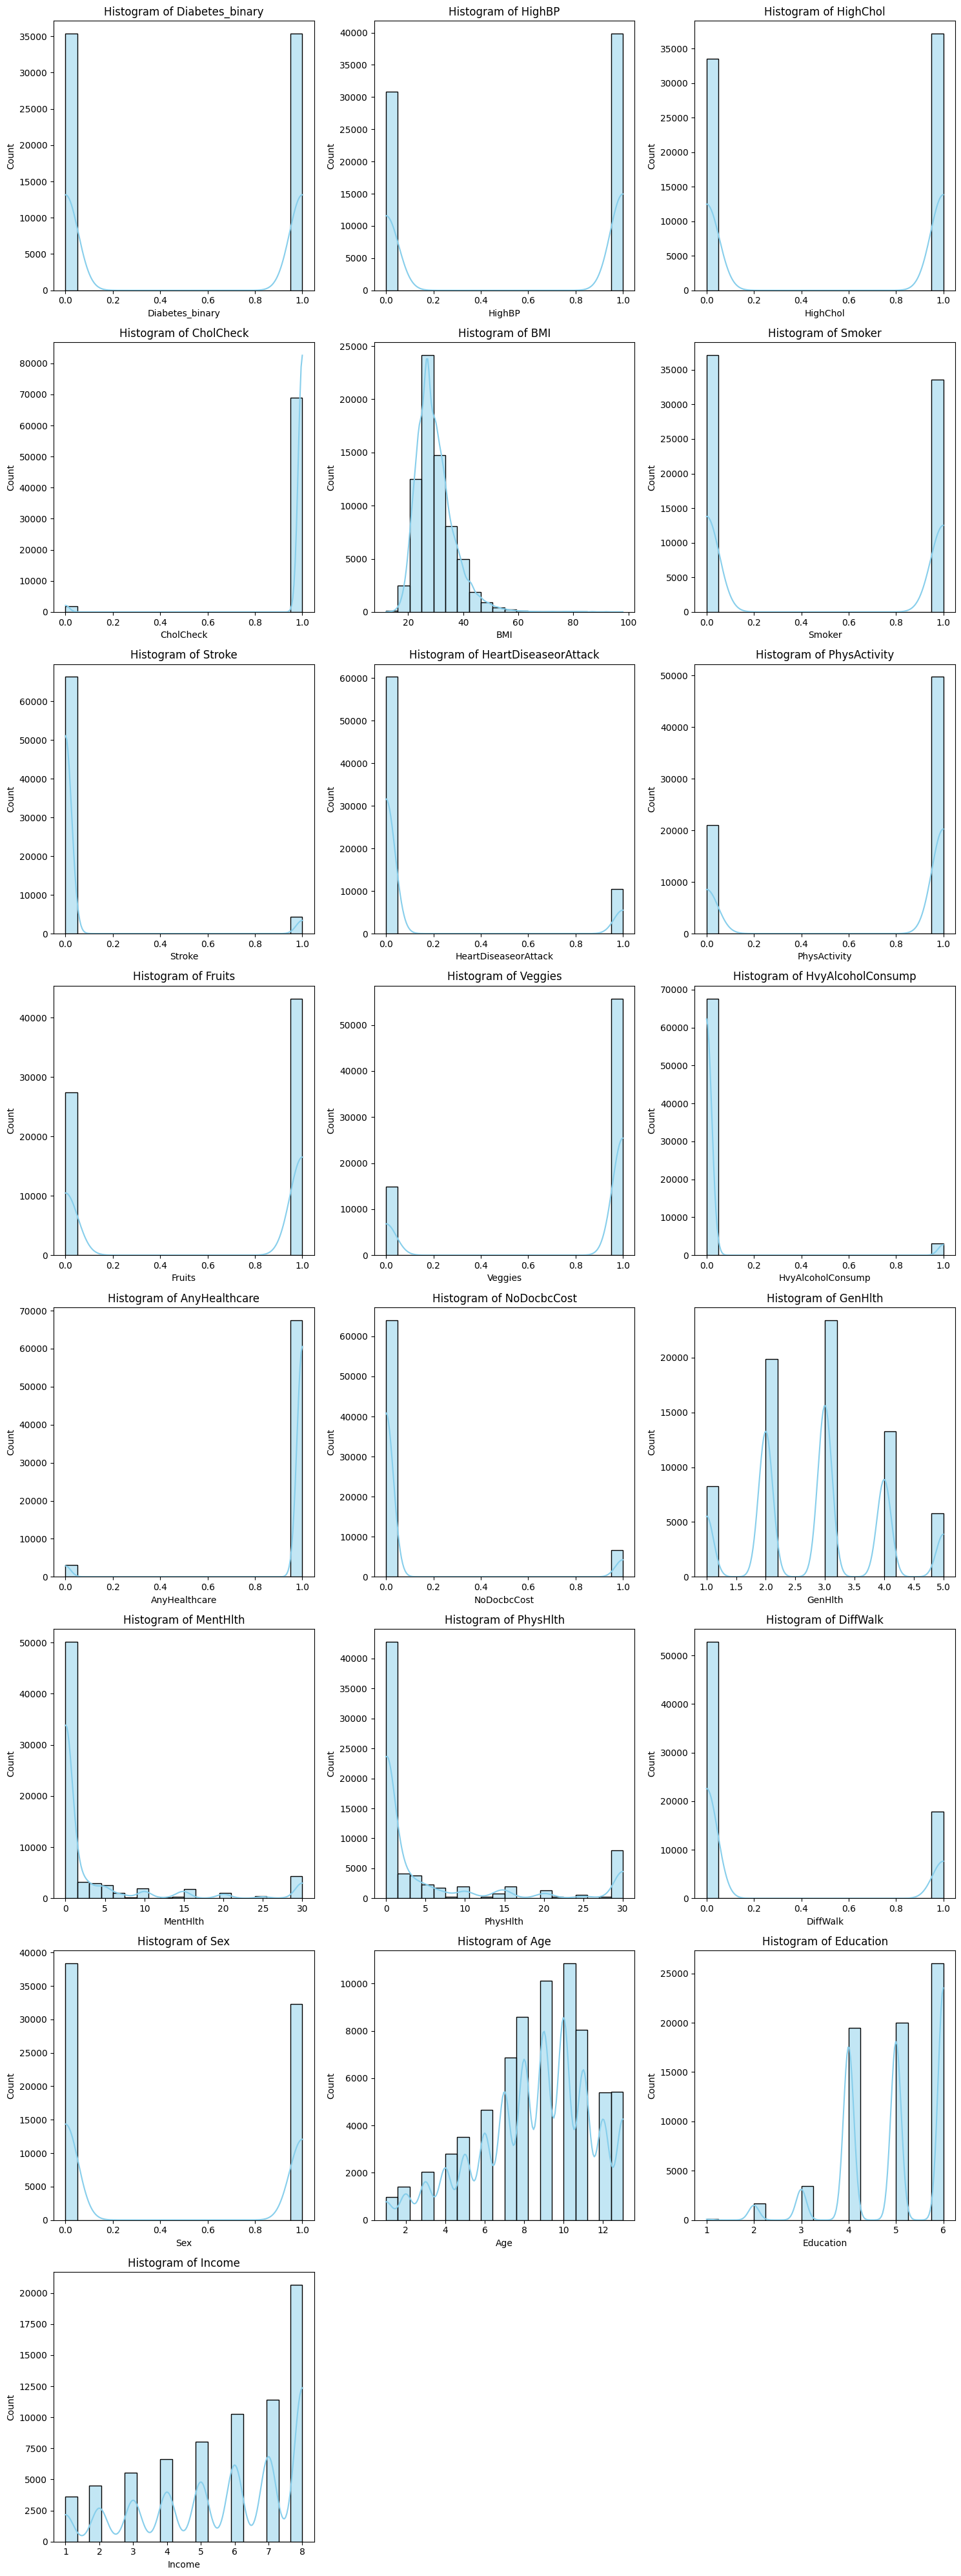

In [ ]:

# Display summary statistics using df.describe()
summary_stats = df.describe()

# Calculate the number of rows and columns for the subplot grid
num_cols = len(summary_stats.columns)
num_rows = (num_cols - 1) // 3 + 1  # Calculate the number of rows dynamically

# Plot histograms for each numerical column
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(summary_stats.columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust the subplot grid based on the number of columns
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


###Correlation Check between variables of interest


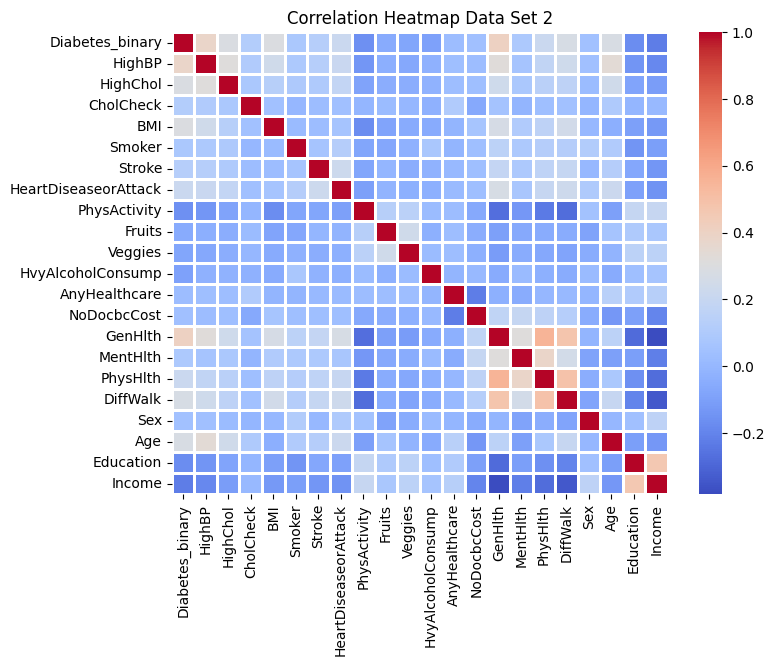

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called 'df'
# Select the columns of interest
variables_of_interest = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
subset_df = df[variables_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=1,)
plt.title('Correlation Heatmap Data Set 2')
plt.show()


Based off the Correlation Heatmap we select the following features to be used in testing: High Blood Pressure, BMI index, HeartDiseaseorAttack, GenHlth, Physical Health, DiffWalk, Age.

# Preprocessing

BMI

In [ ]:
# Display the frequency of each unique value in the 'BMI' column
BMI_value_counts = df['BMI'].value_counts()
print("Value counts in BMI:")
print(BMI_value_counts)

Value counts in BMI:
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: BMI, Length: 80, dtype: int64


Classifying each person as Underweight, normal weight, overweight, or obese based off their BMI index.

In [ ]:
def bmi_category(BMI):
    if BMI < 18.5:
        return 'underweight'
    elif 18.5 <= BMI < 24.9:
        return 'normal weight'
    elif 25 <= BMI < 29.9:
        return 'overweight'
    else:
        return 'obese'

# Assuming you have a column 'BMI' in your DataFrame
df['BMI_CTG'] = df['BMI'].apply(bmi_category)

In [ ]:
df

High Blood Pressure

In [ ]:
# Display the frequency of each unique value in the 'HighBP' column
HighBP_value_counts = df['HighBP'].value_counts()
print("Value counts in HighBP:")
print(HighBP_value_counts)

Value counts in HighBP:
1.0    39832
0.0    30860
Name: HighBP, dtype: int64


Age

In [ ]:
# Assuming df1 is your DataFrame
unique_ages = df['Age'].unique()
print("Distinct age values in the dataset:", unique_ages)

Distinct age values in the dataset: [ 4. 12. 13. 11.  8.  1.  6.  3.  7. 10.  9.  5.  2.]


## Using Logistic Regression Model

In [8]:


# Assuming your dataset is stored in a DataFrame called 'df'
# Select the features and target variable
features_for_classification = ['HighBP', 'HighChol', 'BMI',
                                'HeartDiseaseorAttack', 'PhysActivity',
                                'GenHlth','PhysHlth', 'DiffWalk',  'Age',]

target_variable = 'Diabetes_binary'  # Assuming this is your target variable

# Extract the features and target variable
X = df[features_for_classification]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




ValueError: ignored

# KNN Model


Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      7090
         1.0       0.72      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139


Confusion Matrix:
[[5000 2090]
 [1672 5377]]


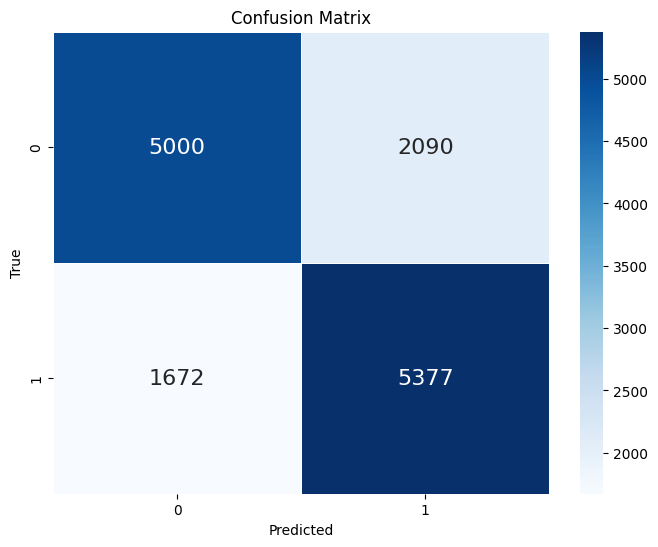

In [ ]:


# Assuming your dataset is stored in a DataFrame called 'df'
# Select the features and target variable
features_for_classification = ['HighBP', 'HighChol', 'BMI',
                                'HeartDiseaseorAttack', 'PhysActivity',
                                'GenHlth','PhysHlth', 'DiffWalk',  'Age',]

target_variable = 'Diabetes_binary'  # Assuming this is your target variable

# Extract the features and target variable
X = df[features_for_classification]
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=20)  # You can adjust the value of n_neighbors

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Clustering Model

In [ ]:
# Assuming your DataFrame is named 'df'
# Replace 'Diabetes_012' with the actual target column name in your dataset

# Filter instances where diabetes is present (Diabetes_012 == 2)
diabetes_positive_instances = df[df['Diabetes_binary'] == 1]

# Display the features for instances where diabetes is present
features_for_diabetes_positive = diabetes_positive_instances[numerical_columns_for_clustering]
print(features_for_diabetes_positive)


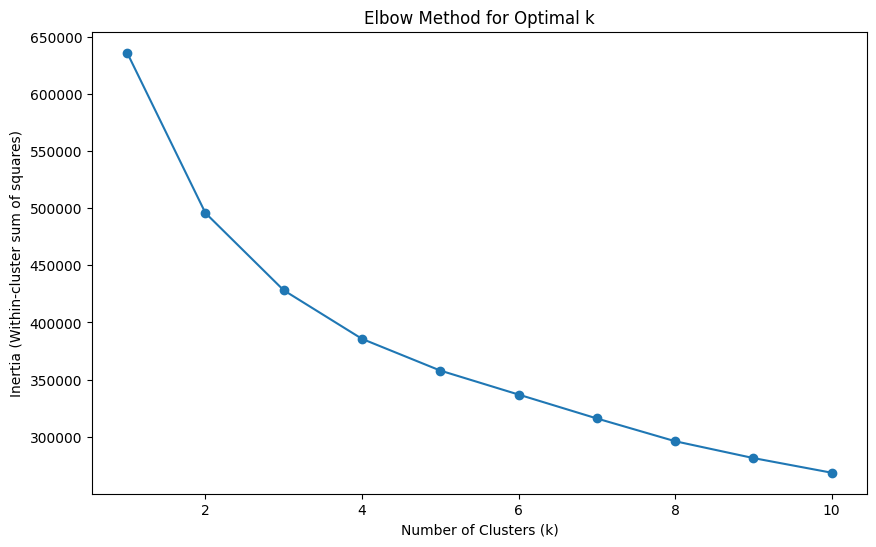

<ipython-input-65-5ec7c0980cf1>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_standardized)


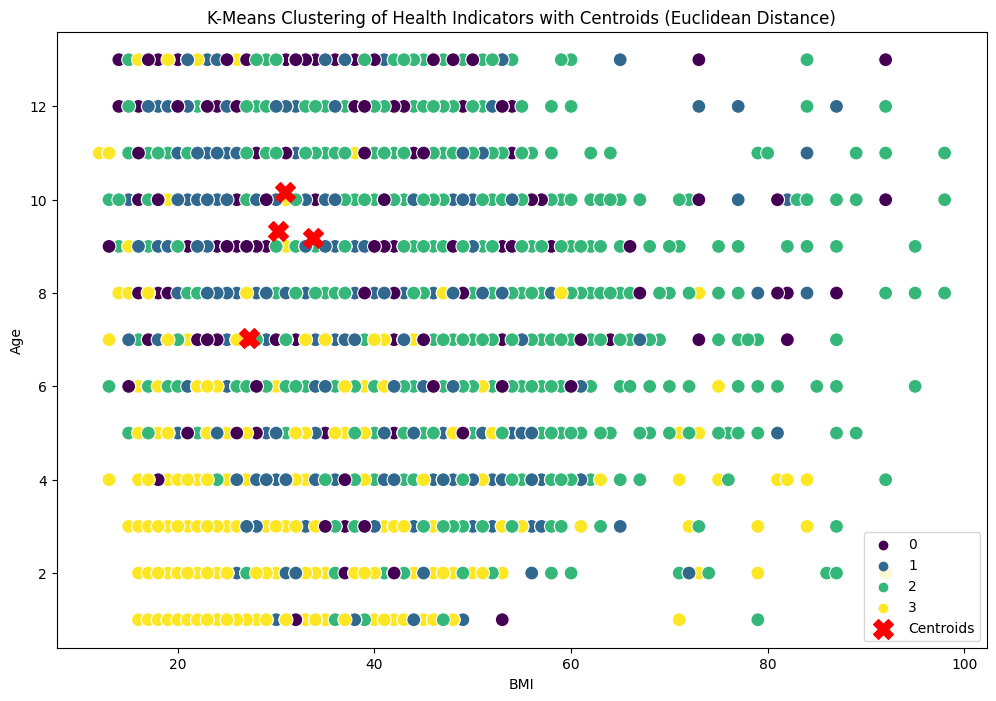

Cluster Centers (Centroids):
     HighBP  HighChol        BMI  HeartDiseaseorAttack  PhysActivity  \
0  0.830822  0.756654  30.915949          1.000000e+00      0.590802   
1  0.981957  0.614416  30.201493         -2.031708e-14      0.762101   
2  0.742959  0.662348  33.751571          1.706882e-03      0.426100   
3  0.012507  0.290375  27.194710          8.040084e-03      0.836130   

    GenHlth   PhysHlth  DiffWalk        Age  
0  3.603620  10.767417  0.504403  10.156360  
1  2.664240   1.778037  0.049503   9.335440  
2  3.874234  17.136007  0.843355   9.169524  
3  2.160180   1.593024  0.029519   7.029519  


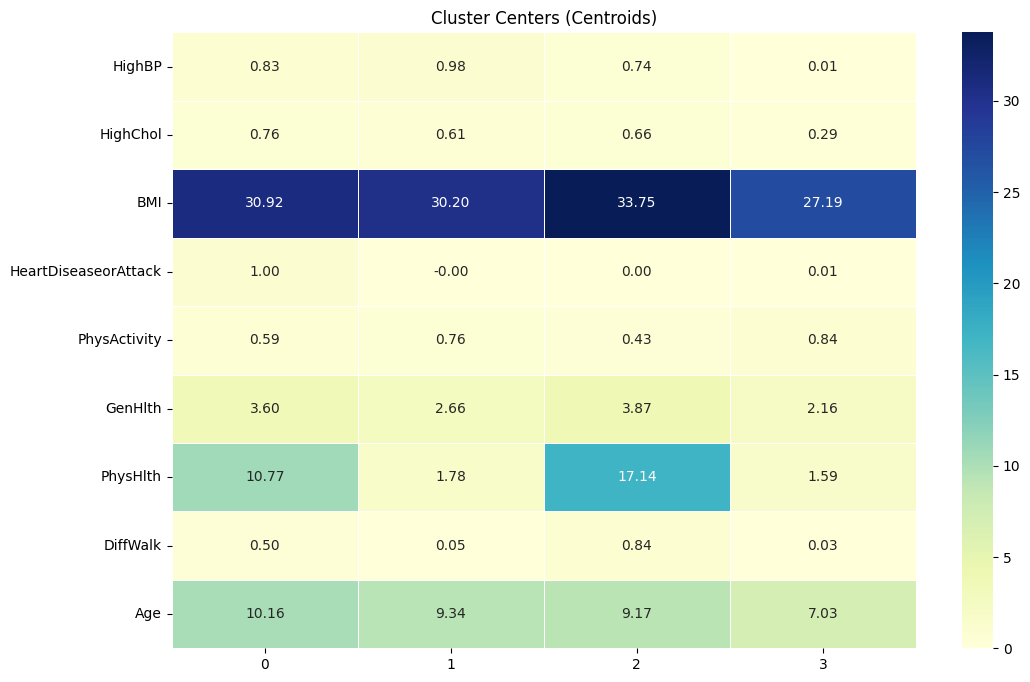

Cluster Summary:
Cluster                  0             1             2             3
HighBP count  10221.000000  21813.000000  12907.000000  25751.000000
       mean       0.830838      0.982396      0.742930      0.012504
       std        0.374913      0.131511      0.437035      0.111124
       min        0.000000      0.000000      0.000000      0.000000
       25%        1.000000      1.000000      0.000000      0.000000
...                    ...           ...           ...           ...
Age    min        1.000000      1.000000      1.000000      1.000000
       25%        9.000000      8.000000      8.000000      5.000000
       50%       10.000000     10.000000      9.000000      7.000000
       75%       12.000000     11.000000     11.000000      9.000000
       max       13.000000     13.000000     13.000000     13.000000

[72 rows x 4 columns]


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with relevant columns

# Selecting numerical columns for clustering
numerical_columns_for_clustering = ['HighBP', 'HighChol', 'BMI',
                                'HeartDiseaseorAttack', 'PhysActivity',
                                'GenHlth','PhysHlth', 'DiffWalk',  'Age',]

# Extracting the relevant data
cluster_data = df[numerical_columns_for_clustering]

# Standardizing the data (important for k-means)
scaler = StandardScaler()
cluster_data_standardized = scaler.fit_transform(cluster_data)

# Find the optimal number of clusters using the Elbow Method
inertia_values = []
possible_k_values = range(1, 11)  # You can adjust the range based on your requirements

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(cluster_data_standardized)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.show()

# Choose the optimal k based on the Elbow Method (in this case, you visually inspect the plot)
optimal_k_elbow = 4 # Adjust this based on the Elbow Method plot

# Fit the k-means model with the optimal k
kmeans = KMeans(n_clusters=optimal_k_elbow, random_state=42, n_init=10, max_iter=300)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_standardized)


# Visualize the clustering using a scatter plot
# Visualize the clustering using a scatter plot with larger markers
plt.figure(figsize=(12, 8))
sns.scatterplot(x='BMI', y='Age', hue='Cluster', data=cluster_data, palette='viridis', s=100)
plt.scatter(centroids['BMI'], centroids['Age'], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering of Health Indicators with Centroids (Euclidean Distance)')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend()
plt.show()


# Analyze the centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_columns_for_clustering)
print("Cluster Centers (Centroids):")
print(centroids)

# Analyze the statistics of variables within the clusters compared to the whole dataset
cluster_summary = cluster_data.groupby('Cluster').describe().transpose()

# Visualize the cluster profiles
plt.figure(figsize=(12, 8))
sns.heatmap(centroids.T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Cluster Centers (Centroids)')
plt.show()

# Display statistics of variables within clusters compared to the whole dataset
print("Cluster Summary:")
print(cluster_summary)
